In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kstest
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
import math
from sklearn.preprocessing import LabelEncoder

# About Dataset

Dataset ini merekam pengalaman pelanggan selama perjalanan penerbangan. Data mencakup profil penumpang, jenis perjalanan, kelas penerbangan, keterlambatan, serta berbagai penilaian layanan (service rating) mulai dari proses check-in, kenyamanan kursi, hiburan, hingga kebersihan kabin.

Tujuan utama dataset adalah menganalisis tingkat **kepuasan pelanggan (satisfaction)** dan faktor-faktor yang memengaruhinya.

**Data Dictionary**

| Kolom                                 | Deskripsi                                                       |
| ------------------------------------- | --------------------------------------------------------------- |
| **id**                                | ID unik setiap penumpang                                        |
| **Gender**                            | Jenis kelamin penumpang                                         |
| **Customer Type**                     | Tipe pelanggan (Loyal Customer atau Disloyal Customer)          |
| **Age**                               | Umur penumpang                                                  |
| **Type of Travel**                    | Tujuan perjalanan (Business Travel atau Personal Travel)        |
| **Class**                             | Kelas penerbangan (Business, Eco, Eco Plus)                     |
| **Flight Distance**                   | Jarak penerbangan (dalam mil/km sesuai dataset)                 |
| **Inflight wifi service**             | Rating kualitas wifi selama penerbangan (skala 1–5)             |
| **Departure/Arrival time convenient** | Kenyamanan jadwal keberangkatan/kedatangan                      |
| **Ease of Online booking**            | Kemudahan pemesanan tiket secara online                         |
| **Gate location**                     | Kenyamanan lokasi gate keberangkatan                            |
| **Food and drink**                    | Kepuasan terhadap makanan & minuman                             |
| **Online boarding**                   | Pengalaman boarding online                                      |
| **Seat comfort**                      | Kenyamanan kursi                                                |
| **Inflight entertainment**            | Kualitas hiburan selama penerbangan                             |
| **On-board service**                  | Pelayanan awak kabin di dalam pesawat                           |
| **Leg room service**                  | Kenyamanan ruang kaki                                           |
| **Baggage handling**                  | Penanganan bagasi                                               |
| **Checkin service**                   | Pelayanan saat check-in                                         |
| **Inflight service**                  | Pelayanan umum selama penerbangan                               |
| **Cleanliness**                       | Kebersihan pesawat                                              |
| **Departure Delay in Minutes**        | Keterlambatan keberangkatan (menit)                             |
| **Arrival Delay in Minutes**          | Keterlambatan kedatangan (menit)                                |
| **Satisfaction**                      | Status kepuasan pelanggan (Satisfied / Neutral or Dissatisfied) |

# Importing Data

## a. Membaca dataset

In [2]:
# Mengimport data csv
df = pd.read_csv("/Users/anastyarachmaindiarto/Downloads/Customer_Satisfaction_and_Sentiment_Analysis.csv")

# Menampilkan 10 data pertama pada dataset
df.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


## b. Informasi dataset

In [3]:
# Memeriksa jumlah baris dan kolom pada dataset 
df.shape

(100000, 25)

Dataset ini memiliki **100.000 baris** dan **25 kolom**.

In [4]:
# Memeriksa informasi seperti nama kolom, jumlah non-null, dan tipe data pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         100000 non-null  int64  
 1   id                                 100000 non-null  int64  
 2   Gender                             100000 non-null  object 
 3   Customer Type                      100000 non-null  object 
 4   Age                                100000 non-null  int64  
 5   Type of Travel                     100000 non-null  object 
 6   Class                              100000 non-null  object 
 7   Flight Distance                    100000 non-null  int64  
 8   Inflight wifi service              100000 non-null  int64  
 9   Departure/Arrival time convenient  100000 non-null  int64  
 10  Ease of Online booking             100000 non-null  int64  
 11  Gate location                      10000

Dataset ini memiliki **20 data numerikal** (1 float dan 19 integer) dan **5 tipe data kategorikal**.

In [5]:
# Memeriksa kolom pada dataset
df.columns.to_list()

['Unnamed: 0',
 'id',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

In [6]:
# Memeriksa deskripsi statistik pada data numerikal
df.describe().round(2)

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,99700.00
mean,49999.50,64925.81,39.38,1190.59,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.30,3.64,3.29,14.82,15.19
std,28867.66,37453.37,15.11,997.24,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.21,38.68
min,0.00,1.00,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,24999.75,32554.75,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,49999.50,64883.50,40.00,844.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,74999.25,97346.25,51.00,1744.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,99999.00,129880.00,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


In [7]:
# Memeriksa deskripsi pada data kategorikal
df.describe(include="object")

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,100000,100000,100000,100000,100000
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,50714,81713,68977,47806,56665


# Distribusi Data

In [8]:
# Uji Distribusi Kolmogorov-Smirnov
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:

    # Standarisasi (Z-score)
    z_score = (df[col] - df[col].mean()) / df[col].std()

    # Drop NA jika ada
    z_score = z_score.dropna()

    # Uji KS
    stat, p = kstest(z_score, 'norm')

    print(f"Kolom: {col}")
    print(f"  Statistik uji : {stat:.4f}")
    print(f"  p-value       : {p:.6f}")

    if p > 0.05:
        print("Data berdistribusi normal\n")
    else:
        print("Data tidak berdistribusi normal\n")

Kolom: Unnamed: 0
  Statistik uji : 0.0572
  p-value       : 0.000000
Data tidak berdistribusi normal

Kolom: id
  Statistik uji : 0.0572
  p-value       : 0.000000
Data tidak berdistribusi normal

Kolom: Age
  Statistik uji : 0.0544
  p-value       : 0.000000
Data tidak berdistribusi normal

Kolom: Flight Distance
  Statistik uji : 0.1576
  p-value       : 0.000000
Data tidak berdistribusi normal

Kolom: Inflight wifi service
  Statistik uji : 0.1589
  p-value       : 0.000000
Data tidak berdistribusi normal

Kolom: Departure/Arrival time convenient
  Statistik uji : 0.1925
  p-value       : 0.000000
Data tidak berdistribusi normal

Kolom: Ease of Online booking
  Statistik uji : 0.1489
  p-value       : 0.000000
Data tidak berdistribusi normal

Kolom: Gate location
  Statistik uji : 0.1570
  p-value       : 0.000000
Data tidak berdistribusi normal

Kolom: Food and drink
  Statistik uji : 0.1752
  p-value       : 0.000000
Data tidak berdistribusi normal

Kolom: Online boarding
  Stati

Distribusi setiap variabel dianalisis terlebih dahulu untuk memahami karakteristik penyebaran nilainya. Tahap ini dilakukan untuk menentukan apakah data mengikuti pola distribusi normal atau tidak, sehingga pendekatan analisis yang digunakan pada proses selanjutnya dapat dipilih secara tepat. Mengingat jumlah observasi melebihi 5.000, pengujian normalitas dilakukan menggunakan metode **Kolmogorov–Smirnov**.

> Berdasarkan hasil pengujian, seluruh variabel tidak menunjukkan distribusi normal. Kondisi ini umum terjadi pada data pengalaman layanan penerbangan, karena sebagian besar penumpang cenderung memberikan penilaian tinggi pada layanan (rating 4–5), sementara hanya sebagian kecil memberikan nilai rendah. Selain itu, variabel keterlambatan juga bersifat tidak seimbang, di mana mayoritas penerbangan tidak mengalami delay atau hanya mengalami keterlambatan kecil, sedangkan sejumlah kecil penerbangan memiliki keterlambatan yang sangat besar. Pola ini menunjukkan adanya ketimpangan (skewness), di mana sebagian kecil observasi memiliki nilai ekstrem dibandingkan mayoritas data.


# Data Cleaning

## a. Konsistensi data (tipe data dan penulisan)

In [9]:
# Mengetahui isi data dan nilai unik untuk tipe data kategorikal

cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns

cat_values = []

for col in cat_cols:
    cat_values.append({
        "column": col,
        "unique_values": df[col].dropna().unique().tolist(),
        "n_unique": df[col].nunique(dropna=True)
    })

cat_values_df = pd.DataFrame(cat_values)

pd.set_option("display.max_colwidth", 100)
cat_values_df

,column,unique_values,n_unique
0,Gender,"[Male, Female]",2
1,Customer Type,"[Loyal Customer, disloyal Customer]",2
2,Type of Travel,"[Personal Travel, Business travel]",2
3,Class,"[Eco Plus, Business, Eco]",3
4,satisfaction,"[neutral or dissatisfied, satisfied]",2


Pada tahap pemeriksaan konsistensi data kategorikal, ditemukan bahwa beberapa nilai pada variabel **Customer Type**, **Type of Travel**, dan **satisfaction** belum menggunakan huruf kapital di awal kata. Oleh karena itu, dilakukan standarisasi penulisan dengan menerapkan format kapitalisasi yang seragam. Selain itu, penamaan kolom satisfaction juga disesuaikan agar konsisten dengan format penamaan variabel lainnya.

In [10]:
# Mengetahui isi data kategorikal satu persatu
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns

cat_values = {}

for col in cat_cols:
    cat_values[col] = df[col].dropna().unique().tolist()

cat_values

{'Gender': ['Male', 'Female'],
 'Customer Type': ['Loyal Customer', 'disloyal Customer'],
 'Type of Travel': ['Personal Travel', 'Business travel'],
 'Class': ['Eco Plus', 'Business', 'Eco'],
 'satisfaction': ['neutral or dissatisfied', 'satisfied']}

In [11]:
# Mengetahui isi data numerik satu persatu
num_cols = df.select_dtypes(include=["number"]).columns

num_values = {}

for col in num_cols:
    num_values[col] = df[col].dropna().unique().tolist()

num_values

{'Unnamed: 0': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  15

In [12]:
# Membuat ringkasan untuk setiap variabel
summary = pd.DataFrame({
    "dtype": df.dtypes.astype(str),
    "n_unique": df.nunique(),
    "unique_values_sample": [
        df[col].dropna().unique()[:100] for col in df.columns
    ]
})

summary

,dtype,n_unique,unique_values_sample
Unnamed: 0,int64,100000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 2..."
id,int64,100000,"[70172, 5047, 110028, 24026, 119299, 111157, 82113, 96462, 79485, 65725, 34991, 51412, 98628, 83..."
Gender,object,2,"[Male, Female]"
Customer Type,object,2,"[Loyal Customer, disloyal Customer]"
Age,int64,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38, 9, 17, 43, 58, 23, 57, 49, 36, 22, 31, ..."
Type of Travel,object,2,"[Personal Travel, Business travel]"
Class,object,3,"[Eco Plus, Business, Eco]"
Flight Distance,int64,3795,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 853, 1061, 1182, 308, 834, 946, 453, 486, 2123, 207..."
Inflight wifi service,int64,6,"[3, 2, 4, 1, 5, 0]"
Departure/Arrival time convenient,int64,6,"[4, 2, 5, 3, 1, 0]"


Selain harus mengubah konsistensi data, seluruh variabel lainnya telah memiliki tipe data yang sesuai dan konsisten.

## b. Data issue

### 1. Missing values

In [13]:
# Mengetahui jumlah missing value pada setiap kolom
missing_df = pd.DataFrame({
    "Jumlah Missing Value": df.isna().sum(),
    "Persentase Missing Value": (df.isna().mean() * 100).round(2).astype(str) + "%"
})

# Menambahkan header untuk nama kolom
missing_df.index.name = "Nama Kolom"

missing_df

,Jumlah Missing Value,Persentase Missing Value
Nama Kolom,,
Unnamed: 0,0,0.0%
id,0,0.0%
Gender,0,0.0%
Customer Type,0,0.0%
Age,0,0.0%
Type of Travel,0,0.0%
Class,0,0.0%
Flight Distance,0,0.0%
Inflight wifi service,0,0.0%


### 2. Duplikasi data

Pada dataset ini, hanya kolom **Arrival Delay in Minutes** yang mempunyai nilai kosong, dengan jumlah 300 entri atau 0,3% dari keseluruhan data.

In [14]:
# Memeriksa duplikasi data 
print(df.duplicated().sum())

0


### 3. Outlier (nilai ekstrem)

Tidak ditemukan adanya data duplikat pada dataset.

In [15]:
# Memeriksa outlier
num_cols = df.select_dtypes(include=["number"]).columns

# Hitung Q1, Q3, IQR
q1 = df[num_cols].quantile(0.25)
q3 = df[num_cols].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Identifikasi outlier
outlier_mask = (df[num_cols] < lower) | (df[num_cols] > upper)
outlier_values = df[outlier_mask] # Untuk melihat nilai outlier
jumlah_outlier = outlier_mask.sum(axis=0)

# Total jumlah data (baris)
total_data = len(df)

# Hitung persentase outlier per kolom
persentase_outlier = (jumlah_outlier / total_data * 100).round(2).astype(str) + "%"

# Gabungkan jumlah & persentase ke dalam DataFrame
outlier_summary = pd.DataFrame({
    "Jumlah Outlier": jumlah_outlier,
    "Persentase Outlier (%)": persentase_outlier
})

outlier_summary

,Jumlah Outlier,Persentase Outlier (%)
Nama Kolom,,
Unnamed: 0,0,0.0%
id,0,0.0%
Age,0,0.0%
Flight Distance,2185,2.18%
Inflight wifi service,0,0.0%
Departure/Arrival time convenient,0,0.0%
Ease of Online booking,0,0.0%
Gate location,0,0.0%
Food and drink,0,0.0%


Berdasarkan hasil deteksi outlier, beberapa variabel numerik seperti **price**, **shipping_charges**, **product_weight_g**, **payment_installments**, dan **payment_value** menunjukkan persentase outlier yang relatif tinggi. Namun, pada konteks data transaksi e-commerce, nilai ekstrem tersebut diindikasikan bukan menunjukkan kesalahan pencatatan data, melainkan merepresentasikan variasi alami perilaku pelanggan dan karakteristik produk.

Oleh karena itu, **outlier dipertahankan** karena mencerminkan variasi nyata dalam transaksi bisnis. Penanganan dilakukan dengan pendekatan analisis yang berbasis agregasi pelanggan, bukan dengan penghapusan data, sehingga informasi pelanggan bernilai tinggi tetap terjaga.

# Handling issue

In [16]:
df_clean = df.copy()

## a. Mengubah konsistensi data

In [17]:
# daftar kolom kategorikal yang ingin dirapikan
cols = [
    'Gender',
    'Customer Type',
    'Type of Travel',
    'Class',
    'satisfaction'
]

# kapitalisasi huruf awal setiap kata
for col in cols:
    df_clean[col] = df_clean[col].str.title()

# ubah nama kolom satisfaction -> Satisfaction
df_clean.rename(columns={'satisfaction': 'Satisfaction'}, inplace=True)

# rapikan label khusus
df_clean['Satisfaction'] = df_clean['Satisfaction'].replace({
    'Neutral Or Dissatisfied': 'Neutral or Dissatisfied'
})

# cek hasil
df_clean[cols[:-1] + ['Satisfaction']].head()

Nama Kolom,Gender,Customer Type,Type of Travel,Class,Satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,Neutral or Dissatisfied
1,Male,Disloyal Customer,Business Travel,Business,Neutral or Dissatisfied
2,Female,Loyal Customer,Business Travel,Business,Satisfied
3,Female,Loyal Customer,Business Travel,Business,Neutral or Dissatisfied
4,Male,Loyal Customer,Business Travel,Business,Satisfied


Tahapan ini bertujuan memastikan bahwa seluruh variabel kategorikal memiliki format penulisan yang **konsisten dan terstandarisasi** sebelum dilakukan analisis lebih lanjut.

Pada kondisi awal, beberapa kolom seperti **Gender, Customer Type, Type of Travel, Class,** dan **Satisfaction** memiliki perbedaan format huruf (ada yang huruf kecil semua, ada yang kapital sebagian). Perbedaan ini sebenarnya tidak mengubah makna data, tetapi tetap dilakukan agar data menjadi lebih rapi dan konsisten.

Oleh karena itu dilakukan:

1. Kapitalisasi huruf awal setiap kata untuk menyeragamkan format.
2. Penyesuaian khusus pada label **Neutral or Dissatisfied** agar tetap sesuai penulisan semantik yang benar (kata penghubung *or* tidak perlu kapital).
3. Perubahan nama kolom **satisfaction → Satisfaction** agar konsisten dengan standar penamaan variabel lainnya.

## b. Missing values handling

In [18]:
# Mengisi missing value pada kolom Arrival Delay in Minutes dengan 0
df_clean["Arrival Delay in Minutes"] = df_clean["Arrival Delay in Minutes"].fillna(0)
df_clean

Nama Kolom,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,Neutral or Dissatisfied
1,1,5047,Male,Disloyal Customer,25,Business Travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,Neutral or Dissatisfied
2,2,110028,Female,Loyal Customer,26,Business Travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,Satisfied
3,3,24026,Female,Loyal Customer,25,Business Travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,Neutral or Dissatisfied
4,4,119299,Male,Loyal Customer,61,Business Travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,12942,Male,Loyal Customer,8,Personal Travel,Eco,563,3,5,...,1,5,4,5,5,4,1,35,21.0,Neutral or Dissatisfied
99996,99996,47237,Male,Loyal Customer,61,Personal Travel,Eco Plus,945,1,1,...,3,3,3,4,1,4,3,40,46.0,Neutral or Dissatisfied
99997,99997,41508,Male,Loyal Customer,43,Business Travel,Business,1464,3,3,...,5,5,5,5,4,5,3,0,0.0,Satisfied
99998,99998,107935,Female,Disloyal Customer,22,Business Travel,Business,611,4,2,...,3,2,5,4,1,3,3,15,6.0,Neutral or Dissatisfied


Pada dataset ini terdapat nilai kosong pada kolom **Arrival Delay in Minutes**. Nilai kosong tersebut kemudian **diisi dengan angka 0**, yang secara makna merepresentasikan bahwa penerbangan tidak mengalami keterlambatan saat tiba (tepat waktu).
Keputusan ini didasarkan pada konteks variabel, karena delay merupakan besaran waktu keterlambatan. 

Secara logika operasional:
* Terdapat nilai pada dataset → terjadi keterlambatan
* Nilai 0 → tidak ada keterlambatan
* Nilai kosong → kemungkinan besar data delay tidak tercatat, namun dalam praktik operasional biasanya berarti tidak ada delay

Sehingga, pengisian dengan 0 bukan sekadar imputasi statistik, tetapi juga memiliki makna bisnis yang realistis.

# Encoding

In [19]:
df_encoded = df_clean.copy()

In [21]:
# Encoding kolom kategorikal menjadi numerik
encoding = [  
    'Gender',
    'Customer Type',
    'Type of Travel',
    'Class',
    'Satisfaction'

]

label_encoders = {}

for col in encoding:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Memilih fitur numerik + hasil encoding
non = [
    "Flight Distance",
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness",
    "Departure Delay in Minutes",
    "Arrival Delay in Minutes"
]

df_final = df_encoded[non + encoding]

# Melihat hasil dataset akhir
df_final.head()

# Menampilkan mapping label agar tahu arti setiap angka
for col, le in label_encoders.items():
    print(f"\nKolom: {col}")
    label_mapping = pd.DataFrame({
        'Label': le.transform(le.classes_),
        'Kategori_Asli': le.classes_
    })
    print(label_mapping)


Kolom: Gender
   Label  Kategori_Asli
0      0              0
1      1              1

Kolom: Customer Type
   Label  Kategori_Asli
0      0              0
1      1              1

Kolom: Type of Travel
   Label  Kategori_Asli
0      0              0
1      1              1

Kolom: Class
   Label  Kategori_Asli
0      0              0
1      1              1
2      2              2

Kolom: Satisfaction
   Label            Kategori_Asli
0      0  Neutral or Dissatisfied
1      1                Satisfied


# Heatmap

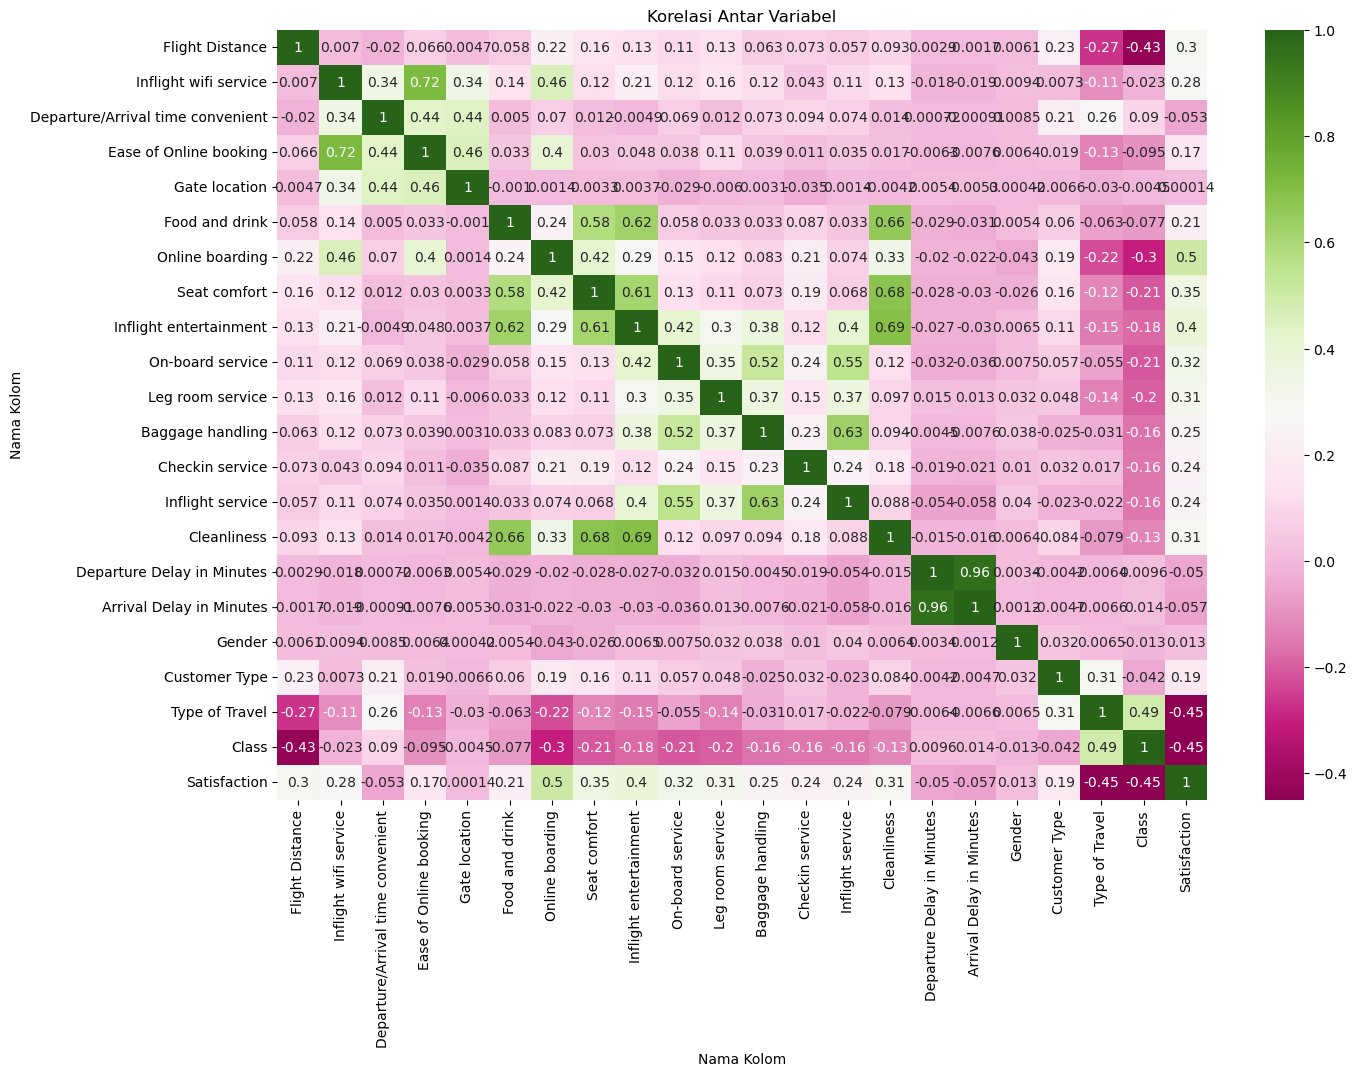

In [22]:
# Menghitung matriks korelasi
hm_data = df_final.corr(numeric_only=True)

# Memvisualisasikan heatmap untuk melihat korelasi antar variable
plt.figure(figsize=(15,10))
sns.heatmap(hm_data, annot=True,cmap="PiYG")
plt.title("Korelasi Antar Variabel")
plt.show()

In [24]:
df_clean.to_excel("/Users/anastyarachmaindiarto/Downloads/data_airline.xlsx", index=False)